#### Initial Analysis 

In [19]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
# place local scripts for charts and analysis here


In [5]:
# read in files
df1 = pd.read_csv("../data/interim/tables/country_data.csv")
df2 = pd.read_csv("../data/interim/tables/company-info.csv")
df3 = pd.read_csv("../data/interim/tables/financial_statement_data.csv")

#### *Analyze each table of data*

In [6]:
df1.head()

,country_name,country_regulator,regulator_link,disclaimer
0,France,AMF,https://www.amf-france.org/eli/fr/aai/amf/rg/2...,True
1,Austria,UGB,NaN,NaN
2,Poland,Polish Financial Supervision Authority,NaN,NaN
3,Italy,CONSOB,NaN,NaN


In [70]:
df2.head()

,factset_id,name,Enterprise Category,Revenue,Total Assets,Number of Employees,FactSet Industry,country,website,Stock Exchange
0,ALM-FR,Alpha MOS SA,medium,8.29,11.44,51,Industrial Machinery,France,http://www.alpha-mos.com/fr,EURONEXT PARIS
1,ALO-FR,Alstom SA,large,6163.00,"33,233.00","83,736",Trucks/Construction/Farm Machinery,France,http://www.alstom.com,EURONEXT PARIS
2,AREVA-FR,Areva SA,large,8336.00,"29,920.00","41,847",Electrical Products,France,http://www.areva.com,EURONEXT PARIS
3,BUR-FR,Burelle S.A.,large,4439.15,"3,742.01","21,833",Auto Parts: OEM,France,http://www.burelle.fr,EURONEXT PARIS
4,CATG-FR,CATANA Group SA,medium,36.93,39.59,183,Trucks/Construction/Farm Machinery,France,http://www.catana.com,EURONEXT PARIS


In [8]:
df3.head()

,finstate_id,factset_id,fiscal_year,translated_financial_statements,complete_financials,audit_firm,disclaimer,notes
0,ALM-FR-1,ALM-FR,31-Dec-2014,NaN,No,NaN,NaN,All official documents in French
1,ALO-FR-2,ALO-FR,31-Mar-2015,NaN,Yes,PricewaterhouseCoopers and Mazars,True,*Provides AMF disclaimer at the beginning stat...
2,AREVA-FR-3,AREVA-FR,31-Dec-2014,NaN,Yes,MAZARS and Ernst & Young,True,NaN
3,BUR-FR-4,BUR-FR,31-Dec-2014,No,CNF,NaN,NaN,NaN
4,CATG-FR-5,CATG-FR,31-Aug-2015,No,CNF,NaN,NaN,NaN


### Analytic-1:

In [12]:
value_counts = df2['Enterprise Category'].value_counts(normalize=True) * 100
print(value_counts)

large       64.161850
medium      17.919075
excluded    10.982659
small        4.046243
micro        2.890173
Name: Enterprise Category, dtype: float64


In [26]:
value_counts.values

array([64.16184971, 17.91907514, 10.98265896,  4.04624277,  2.89017341])

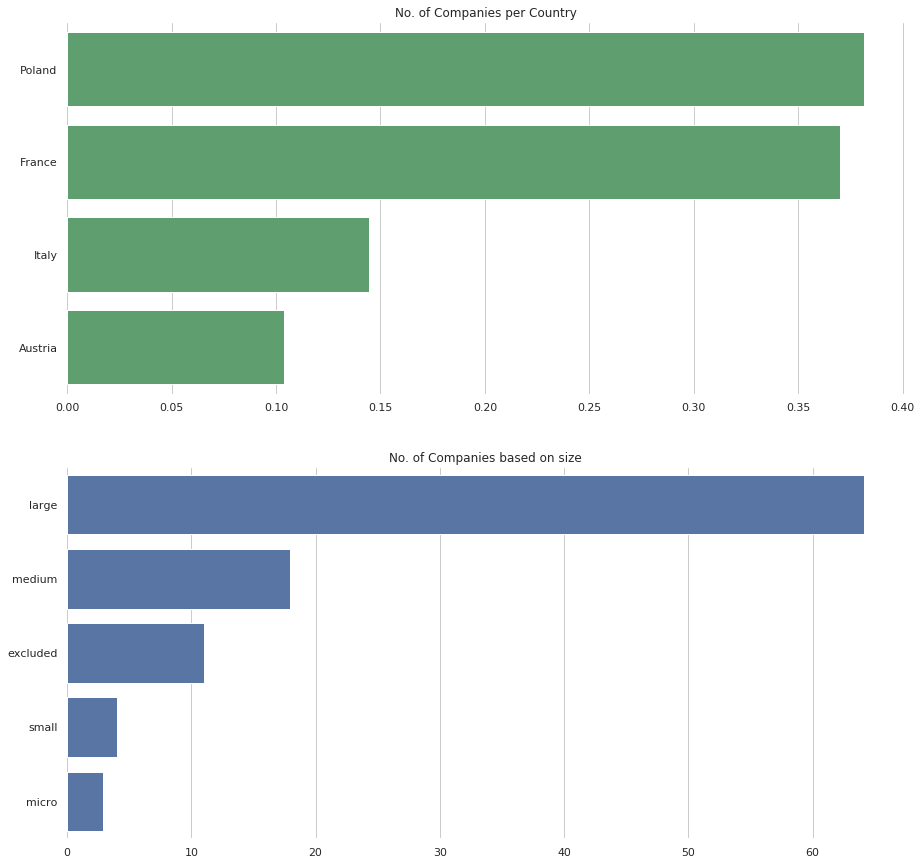

In [50]:
categories = ['large', 'medium', 'excluded', 'small', 'micro']
values = [64.16184971, 17.91907514, 10.98265896,  4.04624277,  2.89017341]

countries = ['Poland', 'France', 'Italy', 'Austria']
no_countries = [0.38150289, 0.3699422 , 0.14450867, 0.10404624]

# bar chart
f, axes = plt.subplots(2, 1, figsize=(15,15))

sns.barplot(x=no_countries, y=countries, color='g', ax=axes[0]).set_title("No. of Companies per Country")
sns.despine(left=True, right=True, bottom=True, top=True)

sns.barplot(x=values , y=categories, color='b', ax=axes[1]).set_title("No. of Companies based on size")
sns.despine(left=True, right=True, bottom=True, top=True)
plt.savefig("appendix-a.png")

Need to define what excluded means within the 2nd chart.

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 10 columns):
factset_id             173 non-null object
name                   173 non-null object
Enterprise Category    173 non-null object
Revenue                173 non-null object
Total Assets           173 non-null object
Number of Employees    173 non-null object
FactSet Industry       173 non-null object
country                173 non-null object
website                173 non-null object
Stock Exchange         173 non-null object
dtypes: object(10)
memory usage: 13.6+ KB


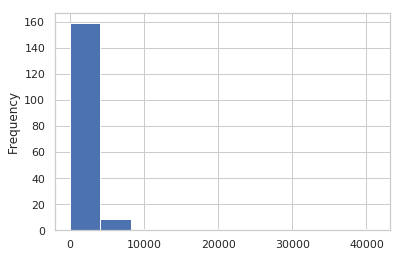

In [61]:
df2['Revenue '].plot.hist()

Data for revenue appears to be messed up. May need to get data from other source such as quandl or get access again to factset.

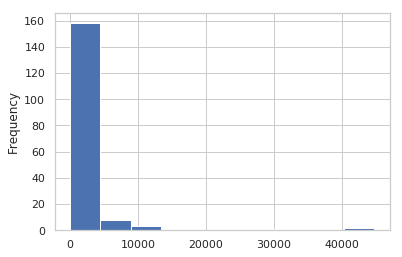

In [75]:
df2['Total Assets '] = df2['Total Assets '].str.replace(",", "").replace("-",0).astype(float)
df2['Total Assets '].plot.hist()

In [78]:
df2['Number of Employees'] = df2['Number of Employees'].str.replace(",", "").replace("-",0).astype(float)

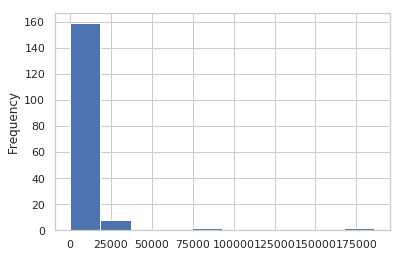

In [79]:
df2['Number of Employees'].plot.hist()